# Time Series Analysis Part 2 
**Dataset Description**
- Portland Oregon riders monthly data: It is a monthly count of riders for the Portland public transportation system. The website states that it is from January 1960 through June 1969

**Tasks**:
- Detect a trend
- Decompose into trend + seasonality + residuals
- Analyze residual distribution
- Select the top 3-5 outliers based on absolute values of residuals 

In [20]:
# import dataset
df = pd.read_csv("portland-oregon-average-monthly-.csv")

In [21]:
# change column name to make it easier for your life
df.columns = ["month", "avgMonthlyRide"]

In [22]:
# remove artifact data
df = df.drop(df.index[df['avgMonthlyRide'] == ' n=114'])

In [23]:
# type transfer: int32 for `avgMonthlyRide`, datetime for `month`
df['avgMonthlyRide'] = df['avgMonthlyRide'].astype(np.int32)
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df.head()

,month,avgMonthlyRide
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [24]:
df['month']

0     1960-01-01
1     1960-02-01
2     1960-03-01
3     1960-04-01
4     1960-05-01
         ...    
109   1969-02-01
110   1969-03-01
111   1969-04-01
112   1969-05-01
113   1969-06-01
Name: month, Length: 114, dtype: datetime64[ns]

In [25]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
month             114 non-null datetime64[ns]
avgMonthlyRide    114 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.2 KB


In [26]:
# get the describe of the dataset
df.describe()

,avgMonthlyRide
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


## 1.  Visualize the time-series of monthly ridership

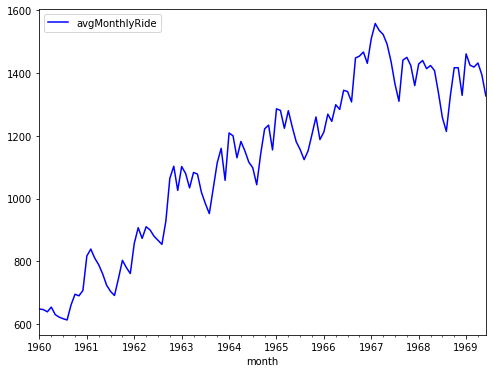

In [27]:
df = df.set_index('month')
df.plot(color='blue', figsize=(8, 6))

## 2. Visualize the 12-month moving average to assess the trend

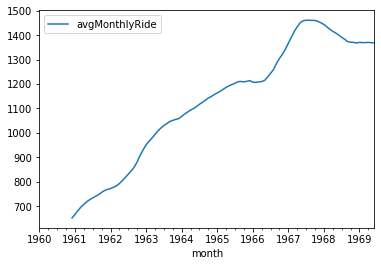

In [28]:
df.rolling(window = 12).mean().plot()

## 3. Perform seasonal decomposition using 12 month period

In [29]:
plt.rcParams['figure.figsize'] = [6, 6]
res = sm.tsa.seasonal_decompose(df,model='additive',freq=12) 

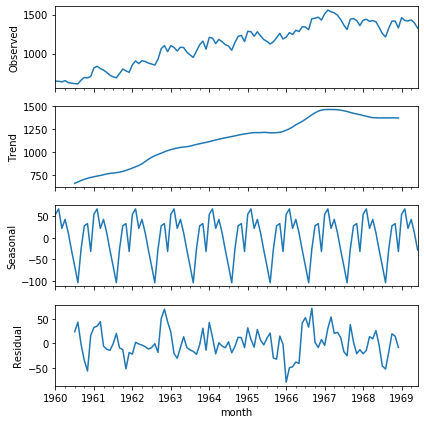

In [30]:
res.plot();

## 4. Visualize the distribution of residues and visually compare it with normal distribution with the same mean and standard deviation

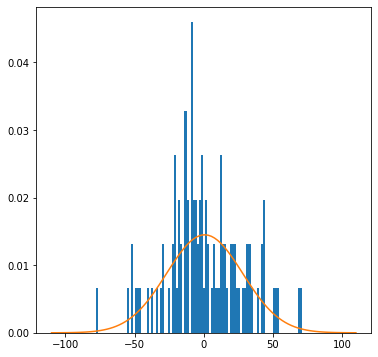

In [31]:
# check the distribution of a sample of data is the histogram
from numpy.random import seed
from numpy.random import randn
# seed the random number generator
seed(1)
# generate univariate observations
# histogram plot
addResult = sm.tsa.seasonal_decompose(df, model='additive', freq = 12)
residual = np.array(addResult.resid)
residual = residual[np.logical_not(np.isnan(residual))]
# get rid of nan values from the seasonal_decompose
plt.hist(residual,bins=100,density=True)
sigma=residual.std()
x=np.linspace(-4*sigma,4*sigma,100)
plt.plot(x,scipy.stats.norm.pdf(x,loc=residual.mean(),scale=sigma))
plt.show()

In [32]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(residual)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

Statistics=0.989, p=0.595
Sample looks Gaussian (fail to reject H0)


## 5. Find the strongest lower/upper outliers (months with the smallest and largest residues)

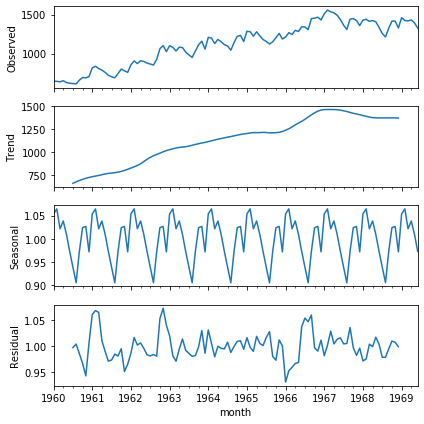

In [33]:
Decomp = sm.tsa.seasonal_decompose(df, model='mult', freq = 12)
Decomp.plot();

In [34]:
outlierData = pd.DataFrame({})
outlierData['Res'] = residual
outlierData['Percentile_rank'] = outlierData.Res.rank(pct = True)-0.5

In [35]:
outlierData.idxmax()

Res                74
Percentile_rank    74
dtype: int64

In [36]:
outlierData.idxmin()

Res                66
Percentile_rank    66
dtype: int64

In [37]:
df.iloc[66]

avgMonthlyRide    1156
Name: 1965-07-01 00:00:00, dtype: int32

In [38]:
df.iloc[74]

avgMonthlyRide    1246
Name: 1966-03-01 00:00:00, dtype: int32